In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

In [2]:
# Read the trajectory data
path = 'data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj.csv'
path = 'data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_500.csv'
path = 'data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_200.csv'
path = 'results/inference/ring_inference/ring_0.4_200x200/36s/TIME_BUFF/1/0/df_traj_200.csv'
path = './data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_0.csv'
path = './data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_200.csv'
path = './results/inference/ring_inference/ring/36s/TIME_BUFF/1/0/df_traj_200.csv'
path = './results/inference/ring_inference/ring/300s/TIME_BUFF/3/0/df_traj_200.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump/300s/TIME_BUFF/3/0/df_traj_200.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/300s/TIME_BUFF/1/0/df_traj_0.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/300s/TIME_BUFF/2/0/df_traj_0.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/300s/TIME_BUFF/2/0/df_traj_200.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/600s/TIME_BUFF/3/0/df_traj_0.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/600s/TIME_BUFF/4/0/df_traj_0.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/600s/TIME_BUFF/4/0/df_traj_200.csv'
# path = './data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_200.csv'
# path = './data/inference/ring/simulation_initialization/initial_clips/ring-01/01/df_traj_0.csv'
path = './results/inference/ring_inference/ring_0.4_no_jump2/300s/TIME_BUFF/5/0/df_traj_200.csv'
path = './results/inference/behavior_net/ring_speed_acc/df_traj_1000.csv'
trajectory = pd.read_csv(path)
trajectory.drop('Unnamed: 0', axis=1, inplace=True)
trajectory['Simulation No'] = trajectory['Simulation No'].astype(int)
trajectory['Car'] = trajectory['Car'].astype(int)
# Ensure the trajectory position starts from zeroes in your plot
for i in range(trajectory['Simulation No'].max()):
    if np.min(trajectory.loc[trajectory['Simulation No'] == i+1,'Position'])<0:
        trajectory.loc[trajectory['Simulation No'] == i+1,'Position'] += np.abs(np.min(trajectory.loc[trajectory['Simulation No'] == i+1,'Position']))
    elif np.min(trajectory.loc[trajectory['Simulation No'] == i+1,'Position'])>0:
        trajectory.loc[trajectory['Simulation No'] == i+1,'Position'] -= np.abs(np.min(trajectory.loc[trajectory['Simulation No'] == i+1,'Position']))
trajectory


,Simulation No,Time,Car,x,y,Position
0,0,0.0,0,1.050000,-32.890000,86.211905
1,0,0.0,10,74.520000,-29.980000,36.358862
2,0,0.0,11,68.730000,-18.840000,42.705763
3,0,0.0,12,61.720000,-11.690000,47.760881
4,0,0.0,13,54.790000,-7.390000,51.877344
...,...,...,...,...,...,...
4083,0,80.4,4,15.038254,-72.238541,108.387740
4084,0,80.4,6,24.490610,-77.555618,113.846102
4085,0,80.4,7,33.920033,-79.880371,118.505930
4086,0,80.4,8,45.861713,-79.344292,4.061646


In [3]:
trajectory[trajectory['Car']==0]

,Simulation No,Time,Car,x,y,Position
0,0,0.0,0,1.050000,-32.890000,86.211905
20,0,0.4,0,0.890000,-33.550000,86.556614
40,0,0.8,0,0.740000,-34.300000,86.938123
60,0,1.2,0,0.580000,-35.140000,87.368891
80,0,1.6,0,0.430000,-36.070000,87.841488
...,...,...,...,...,...,...
3988,0,78.8,0,1.874415,-54.063000,97.076387
4008,0,79.2,0,1.893433,-53.986469,97.013160
4028,0,79.6,0,1.894991,-53.907936,96.957472
4048,0,80.0,0,1.855075,-53.887363,96.963337


In [4]:
trajectory[trajectory['Car']==21]


,Simulation No,Time,Car,x,y,Position
13,0,0.0,21,4.110000,-24.560000,81.735417
33,0,0.4,21,3.920000,-24.930000,81.946269
53,0,0.8,21,3.710000,-25.370000,82.190779
73,0,1.2,21,3.470000,-25.890000,82.478167
93,0,1.6,21,3.200000,-26.480000,82.806440
...,...,...,...,...,...,...
4001,0,78.8,21,0.468835,-48.025276,93.895432
4021,0,79.2,21,0.416580,-48.002277,93.908265
4041,0,79.6,21,0.397196,-48.091286,93.970842
4061,0,80.0,21,0.438094,-48.043324,93.921700


In [5]:
print(np.unique(trajectory['Car']))

[ 0  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


car 0 len 206
car 10 len 206
car 11 len 206
car 12 len 206
car 13 len 206
car 14 len 206
car 15 len 206
car 16 len 206
car 17 len 206
car 18 len 206
car 19 len 206
car 2 len 206
car 20 len 202
car 21 len 202
car 3 len 202
car 4 len 202
car 6 len 202
car 7 len 202
car 8 len 202
car 9 len 202


No handles with labels found to put in legend.


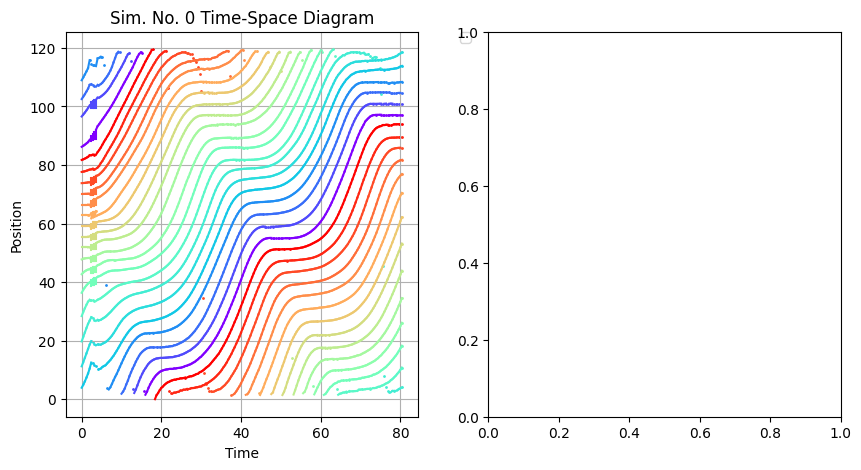

In [6]:
#TODO: Plot the time space diagram of the Simulation No 4 and 10. Note that the cars repeatedly appears. Becareful that you need to justify the whether the cars starts a repeated cycle to make the right plot.
fig,axis = plt.subplots(1,2,figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, trajectory.loc[trajectory['Simulation No'] == 0]['Car'].max()+1)) # The colors you should use to plot each car

iplot = 0
for sim_num in [0]:
    trajs = trajectory.loc[trajectory['Simulation No'] == sim_num]

    # Plotting the trajectories
    for car in trajs['Car'].unique():
        car_data = trajs[trajectory['Car'] == car]
        print('car', car, 'len', len(car_data))
        prev_position = -np.inf  # Initialize with a value that's always smaller
        for i in range(len(car_data) - 1):
            current_point = car_data.iloc[i]
            next_point = car_data.iloc[i + 1]
            
            # Only draw a line to the next point if the position is greater than or equal to the previous one
            if next_point['Position'] >= current_point['Position']:
                axis[iplot].plot([current_point['Time'], next_point['Time']], 
                        [current_point['Position'], next_point['Position']], 
                        color=colors[car])
            else:
                axis[iplot].scatter([current_point['Time']], [current_point['Position']], color=colors[car], s=1)  # Plot only current point
            
        # Plotting the last point in the series
        axis[iplot].scatter([car_data.iloc[-1]['Time']], [car_data.iloc[-1]['Position']], color=colors[car], s=1)

    axis[iplot].legend(loc=1,bbox_to_anchor=(1.15, 1),borderaxespad=0.)
    axis[iplot].set_xlabel('Time')
    axis[iplot].set_ylabel('Position')
    axis[iplot].set_title(f'Sim. No. {sim_num} Time-Space Diagram')
    axis[iplot].grid(True)
    # axis[iplot].show()

    iplot += 1

#

In [51]:
# # An example of the expected time space diagram
